<a href="https://colab.research.google.com/github/Sanjeet2835/LR-model-ML/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [134]:
X = 6 * np.random.rand(200, 1) - 3
# print(x)
y = 0.8*X**2 + 0.9*X + 2 + np.random.randn(200,1)

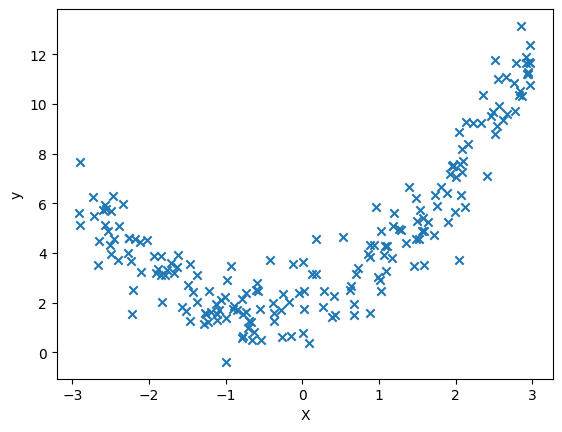

In [135]:
plt.scatter(X,y,marker='x')
plt.ylabel("y")
plt.xlabel("X")
plt.show()

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [137]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Applying simple linear regression in this non linear data

In [138]:
lr.fit(X_train, y_train)

LinearRegression()

In [139]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.2774473600201901

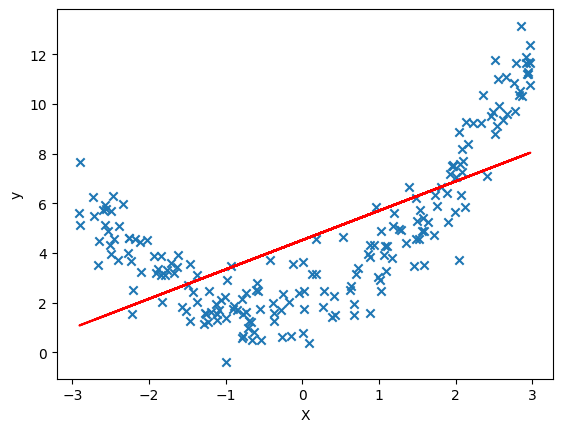

In [140]:
#Plotting the best fit line in this case of non linear data
plt.scatter(X,y,marker='x')
plt.ylabel("y")
plt.xlabel("X")
plt.plot(X_test, y_pred, c='r')
plt.show()

# Applying Polynomial Linear Regression

In [141]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
poly = PolynomialFeatures(degree=2, include_bias=True) #setting bias=True keeps X**0 in the polynomial features, setting it to false removes X**o from polynomial features

In [142]:
#Transformation/Preprocessing, one input feature ---> three (polynomial) features
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

In [143]:
print(X_train[0])
print(X_train_trans[0])

[1.38821556]
[1.         1.38821556 1.92714244]


In [144]:
lr2 = LinearRegression()
lr2.fit(X_train_trans, y_train)

LinearRegression()

In [145]:
y_pred2 = lr2.predict(X_test_trans)

In [146]:
r2r = r2_score(y_test, y_pred2)
r2r

0.8810662942696588

In [147]:
# Sort X_test and y_pred before plotting
sorted_indices = np.argsort(X_test[:, 0])
X_test_sorted = X_test[sorted_indices]
y_pred2_sorted = y_pred2[sorted_indices]

#this helps in sorting all values in order to avoid zigzag lines and thus provides smoother curve

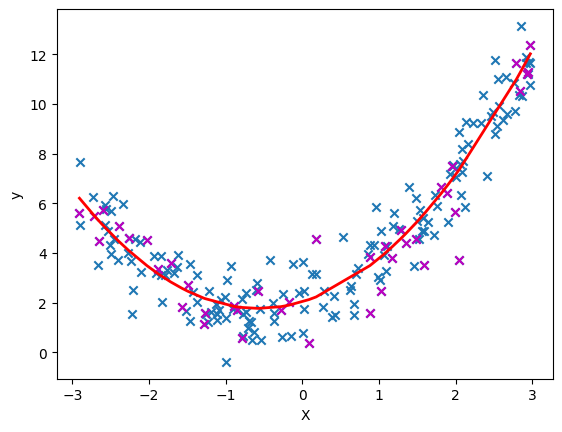

In [148]:
#Plotting
plt.scatter(X,y,marker='x', label ="Training Points")
plt.scatter(X_test, y_test, c='m', marker='x',label ="Testing Points")
plt.plot(X_test_sorted, y_pred2_sorted, linewidth=2,c='r', label ="Predictions")
plt.ylabel("y")
plt.xlabel("X")
plt.show()

In [149]:
#Testing again on random input data

X_new = np.linspace(-5,5,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr2.predict(X_new_poly)

In [150]:
#already sorted due to use of linspace which makes sure data is sorted i.e, either ascending or descending (depending on start and stop given)
print(X_new)

[[-5.        ]
 [-4.94974874]
 [-4.89949749]
 [-4.84924623]
 [-4.79899497]
 [-4.74874372]
 [-4.69849246]
 [-4.64824121]
 [-4.59798995]
 [-4.54773869]
 [-4.49748744]
 [-4.44723618]
 [-4.39698492]
 [-4.34673367]
 [-4.29648241]
 [-4.24623116]
 [-4.1959799 ]
 [-4.14572864]
 [-4.09547739]
 [-4.04522613]
 [-3.99497487]
 [-3.94472362]
 [-3.89447236]
 [-3.84422111]
 [-3.79396985]
 [-3.74371859]
 [-3.69346734]
 [-3.64321608]
 [-3.59296482]
 [-3.54271357]
 [-3.49246231]
 [-3.44221106]
 [-3.3919598 ]
 [-3.34170854]
 [-3.29145729]
 [-3.24120603]
 [-3.19095477]
 [-3.14070352]
 [-3.09045226]
 [-3.04020101]
 [-2.98994975]
 [-2.93969849]
 [-2.88944724]
 [-2.83919598]
 [-2.78894472]
 [-2.73869347]
 [-2.68844221]
 [-2.63819095]
 [-2.5879397 ]
 [-2.53768844]
 [-2.48743719]
 [-2.43718593]
 [-2.38693467]
 [-2.33668342]
 [-2.28643216]
 [-2.2361809 ]
 [-2.18592965]
 [-2.13567839]
 [-2.08542714]
 [-2.03517588]
 [-1.98492462]
 [-1.93467337]
 [-1.88442211]
 [-1.83417085]
 [-1.7839196 ]
 [-1.73366834]
 [-1.68341

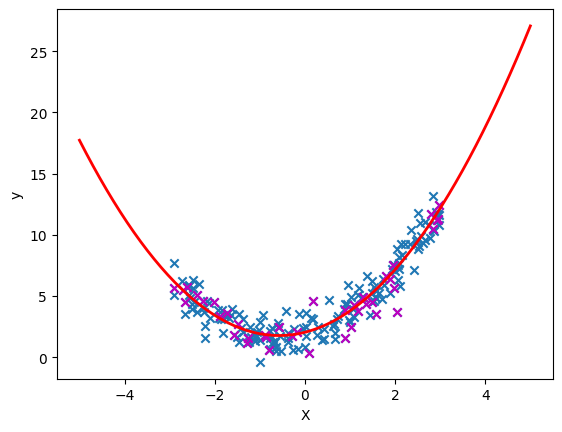

In [151]:
#Plotting
plt.scatter(X,y,marker='x', label ="Training Points")
plt.scatter(X_test, y_test, c='m', marker='x',label ="Testing Points")
plt.plot(X_new, y_new, linewidth=2,c='r', label ="predictions")
plt.ylabel("y")
plt.xlabel("X")
plt.show()